In [27]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [28]:
import math

## Выбери кернел python2

1: 4

2: 1834

3: 123

4: 78264

5: 0.644

6: 3

7: p<

8: 0.4672
    
9: 40

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
data = pd.read_csv("botswana.tsv", sep="\t", index_col=False) 
NaaN = data['agefm'][0]
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


## 1) Узнаём сколько религий

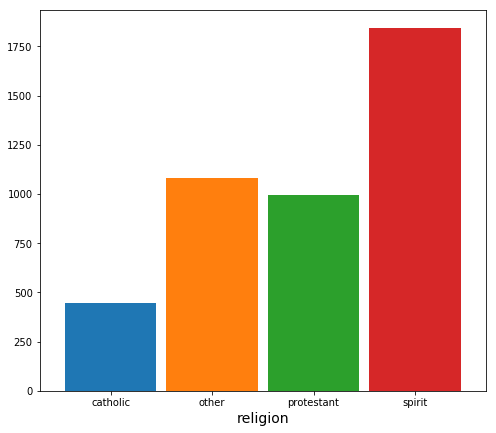

In [31]:
plt.figure(figsize(8,7))
data.groupby('religion')['religion'].agg(lambda x: len(x)).plot(kind='bar', width=0.9)
plt.xticks(rotation=0)
plt.xlabel('religion', fontsize=14)
pylab.show()

## 2) Считаем сколько строк без NaN

In [32]:
data.dropna().describe()

,ceb,age,educ,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.0,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,3.665758,31.835333,5.230643,5.236096,0.966739,0.657579,1.0,20.696292,5.271538,0.541439,0.172846,0.709378,0.123228,0.304253
std,2.433189,7.689567,4.223918,2.371035,0.179365,0.474649,0.0,4.973461,4.821233,0.498416,0.378217,0.454173,0.328788,0.460216
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.0,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,26.000000,0.000000,4.000000,1.000000,0.000000,1.0,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,31.000000,6.000000,5.000000,1.000000,1.000000,1.0,20.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,5.000000,37.000000,7.000000,6.000000,1.000000,1.000000,1.0,23.000000,9.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,1.0,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3) Предобработка с одним

In [34]:
data['nevermarr'] = np.where(data['agefm'].isnull(), 1, 0)
data.drop(['evermarr'], axis = 1, inplace=True)
data['agefm'] = np.where(data['agefm'].isnull(), 0, data['agefm'])
data['heduc'] = np.where((data['heduc'].isnull()) & (data['nevermarr'] == 1), -1, data['heduc'])

In [35]:
data['heduc'].isna().sum()

123

## 4) Предобработка ещё трёх

In [47]:
data['idlnchld_noans'] = np.where(data['idlnchld'].isnull(), 1, 0)
data['heduc_noans'] = np.where(data['heduc'].isnull(), 1, 0)
data['usemeth_noans'] = np.where(data['usemeth'].isnull(), 1, 0)

data['idlnchld'] = np.where(data['idlnchld'].isnull(), -1, data['idlnchld'])
data['heduc'] = np.where(data['heduc'].isnull(), -2, data['heduc'])
data['usemeth'] = np.where(data['usemeth'].isnull(), -1, data['usemeth'])

data.dropna(inplace = True)

In [49]:
print('New Shape =', data.shape[0]*data.shape[1])

('New Shape =', 78264)


## 5) Построение регрессии

In [50]:
q = 'ceb ~ '
for col in data.columns.values:
    print(col)
    if col != 'ceb':
        q = q + col +' + '
q = q[:-3]
print(q)

ceb
age
educ
religion
idlnchld
knowmeth
usemeth
agefm
heduc
urban
electric
radio
tv
bicycle
nevermarr
idlnchld_noans
heduc_noans
usemeth_noans
ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans


In [51]:
m5 = smf.ols(q, 
             data=data)
fitted5 = m5.fit()
print(fitted5.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     477.9
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:29:04   Log-Likelihood:                -7767.4
No. Observations:                4348   AIC:                         1.557e+04
Df Residuals:                    4331   BIC:                         1.568e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

/home/lemikhovalex/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/lemikhovalex/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
/home/lemikhovalex/.local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/lemikhovalex/.local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/lemikhovalex/.local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## 6 Посчитать новые признаки про религии

## 7 Проверим критерий

In [52]:
print('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted5.resid, fitted5.model.exog)[1])

Breusch-Pagan test: p=0.000000


/home/lemikhovalex/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


Маленький, изменяем модель, добавляем поправку

In [53]:
m7 = smf.ols(q, 
             data=data)
fitted7 = m7.fit(cov_type='HC1')
print fitted7.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     380.7
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:29:08   Log-Likelihood:                -7767.4
No. Observations:                4348   AIC:                         1.557e+04
Df Residuals:                    4331   BIC:                         1.568e+04
Df Model:                          16                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

/home/lemikhovalex/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 19, but rank is 16
  'rank is %d' % (J, J_), ValueWarning)


## 8 удаяем признаки

In [59]:
m4 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans',
             data = data)
fitted = m4.fit(cov_type='HC1')

m2 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans',
             data = data
            )
fitted = m2.fit(cov_type='HC1')

print("F=%f, p=%f, k1=%f" % m2.fit().compare_f_test(m4.fit()))

F=1.244235, p=0.285502, k1=5.000000


In [54]:
data8 = data.drop(columns=['religion', 'radio', 'tv'])
data8.head()

,ceb,age,educ,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1,0,0,0
1,2,43,11,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,0,0,0,0
2,0,49,4,4.0,1.0,0.0,22.0,1.0,1,1.0,0.0,0,0,0,0
3,0,24,12,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1,0,0,0
4,3,32,13,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,0,0,0,0


In [55]:
q8 = 'ceb ~ '
for col in data8.columns.values:
    if col != 'ceb':
        q8 = q8 + col +' + '
q8 = q8[:-3]

m8 = smf.ols(q8, 
             data=data8)
fitted8 = m8.fit()
print(fitted8.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     694.3
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:29:12   Log-Likelihood:                -7770.6
No. Observations:                4348   AIC:                         1.557e+04
Df Residuals:                    4336   BIC:                         1.564e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0350      0.197     -5.

Проверяем гомоскедастичность 

In [56]:
print('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted8.resid, fitted8.model.exog)[1])

Breusch-Pagan test: p=0.000000


/home/lemikhovalex/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


Делем поправу Уайта

In [57]:
m8 = smf.ols(q8, 
             data=data8
            )
fitted8 = m8.fit(cov_type='HC1')
print(fitted8.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     547.4
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:29:16   Log-Likelihood:                -7770.6
No. Observations:                4348   AIC:                         1.557e+04
Df Residuals:                    4336   BIC:                         1.564e+04
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0350      0.250     -4.

/home/lemikhovalex/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 11
  'rank is %d' % (J, J_), ValueWarning)


С помощью критерия Фишера проверим, стало ли лучше

In [58]:
print("F=%f, p=%f, k1=%f" % m7.fit().compare_f_test(m8.fit()))

F=1.244235, p=0.285502, k1=5.000000


## 9 удалим 2 признака

In [ ]:
data9 = data.drop(columns=['religion', 'radio', 'tv', 'usemeth', 'usemeth_noans'])
q9 = 'ceb ~ '
for col in data9.columns.values:
    if col != 'ceb':
        q9 = q9 + col +' + '
q9 = q9[:-3]

m9 = smf.ols(q9, 
             data=data9)
fitted = m9.fit()
print(fitted.summary())
print('Breusch-Pagan test: p=', sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])

In [ ]:
m9 = smf.ols(q9, 
             data=data9)
fitted = m9.fit(cov_type='HC1')
print(m7.fit().compare_f_test(m9.fit())[1])